For solving path dependencies

In [1]:
import sys
import os

current_dir = %pwd

# Detect the parent directory dynamically
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

--------- Fold: ---------- 1
Epoch 1/350 	Training - {'Binary Accuracy': 0.5147058823529411, 'Mean Squared Error': 0.2500041677666863}
		Validation - {'Binary Accuracy': 0.4117647058823529, 'Mean Squared Error': 0.2500079703354076}
Epoch 51/350 	Training - {'Binary Accuracy': 0.5147058823529411, 'Mean Squared Error': 0.2500041677666863}
		Validation - {'Binary Accuracy': 0.4117647058823529, 'Mean Squared Error': 0.2500079703354076}
Epoch 101/350 	Training - {'Binary Accuracy': 0.5147058823529411, 'Mean Squared Error': 0.2500041677666863}
		Validation - {'Binary Accuracy': 0.4117647058823529, 'Mean Squared Error': 0.2500079703354076}
Epoch 151/350 	Training - {'Binary Accuracy': 0.5147058823529411, 'Mean Squared Error': 0.2500041677666863}
		Validation - {'Binary Accuracy': 0.4117647058823529, 'Mean Squared Error': 0.2500079703354076}
Epoch 201/350 	Training - {'Binary Accuracy': 0.5147058823529411, 'Mean Squared Error': 0.2500041677666863}
		Validation - {'Binary Accuracy': 0.411764705

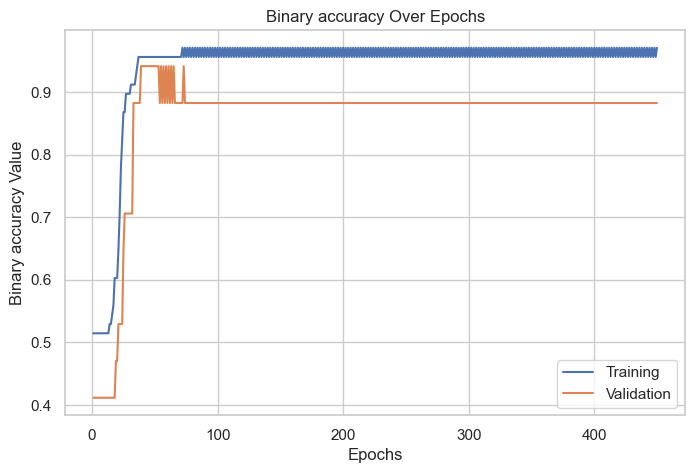

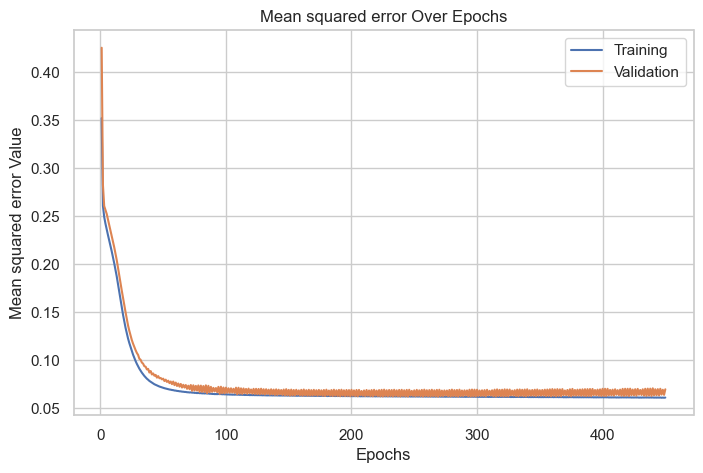

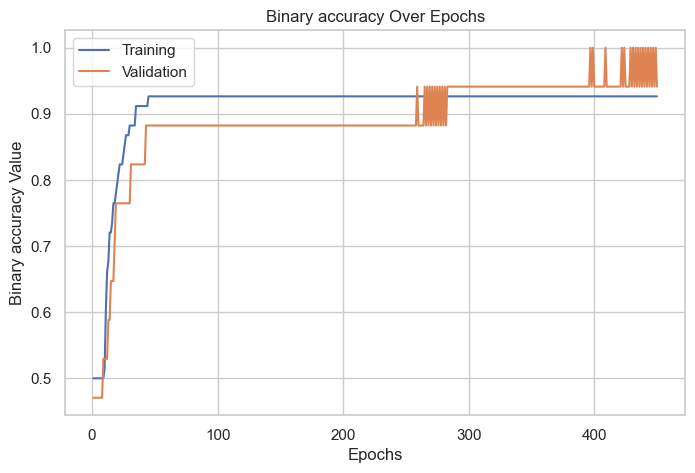

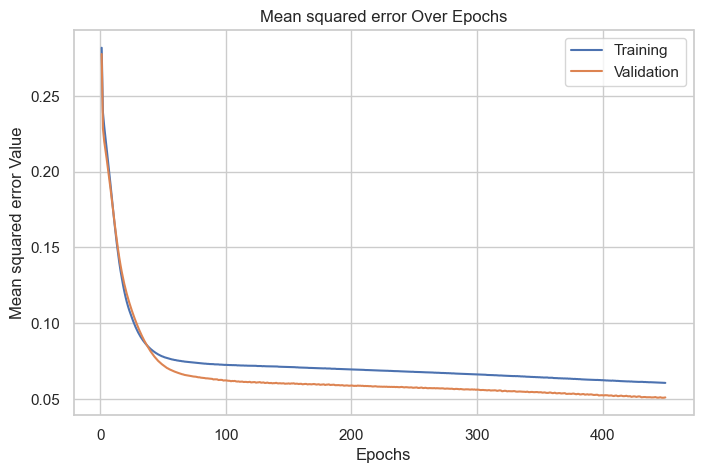

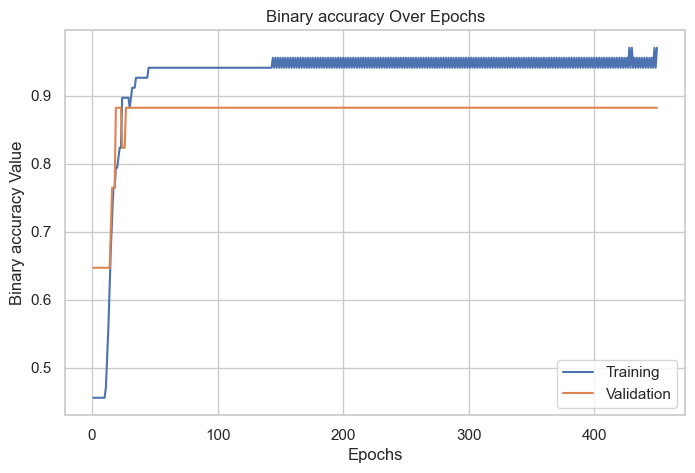

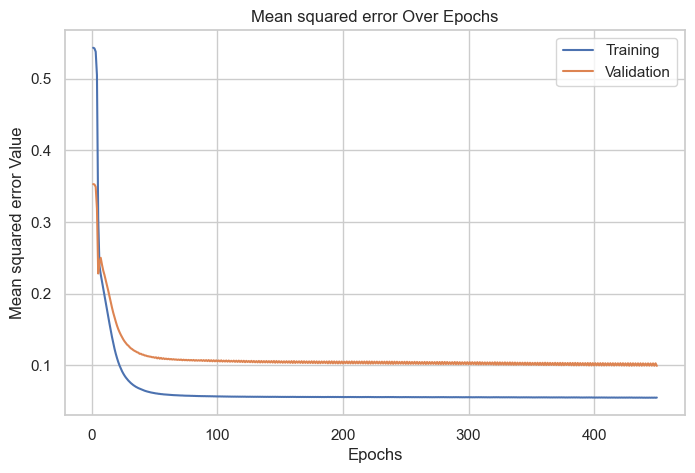

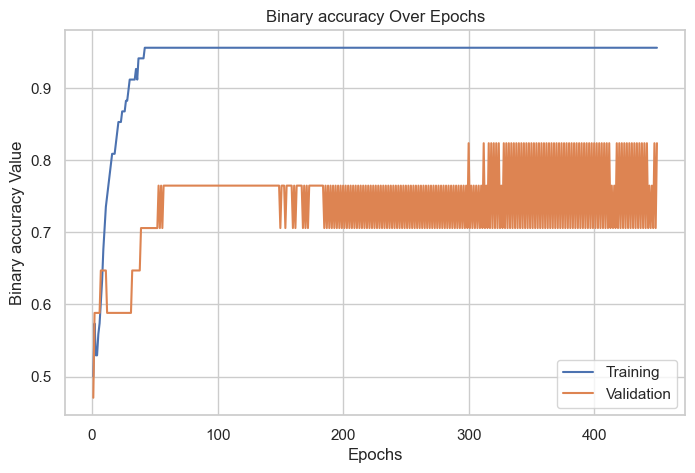

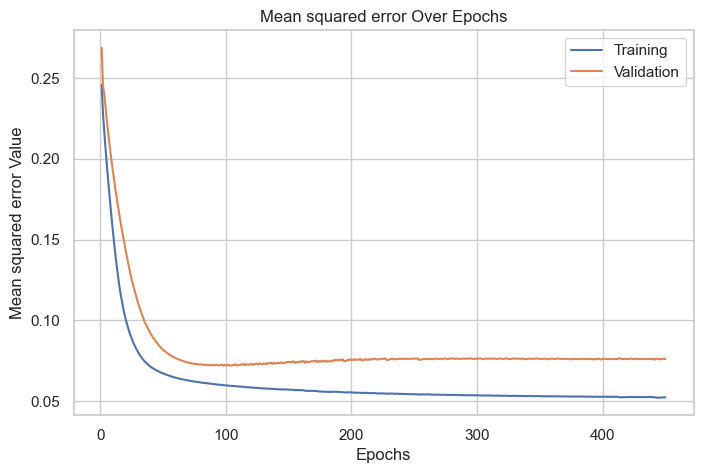

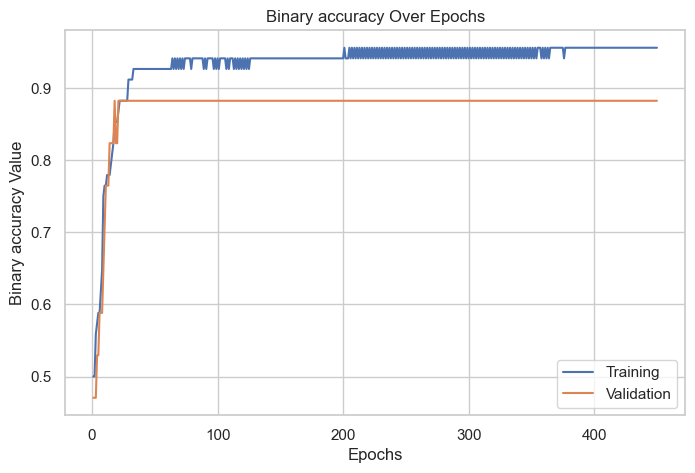

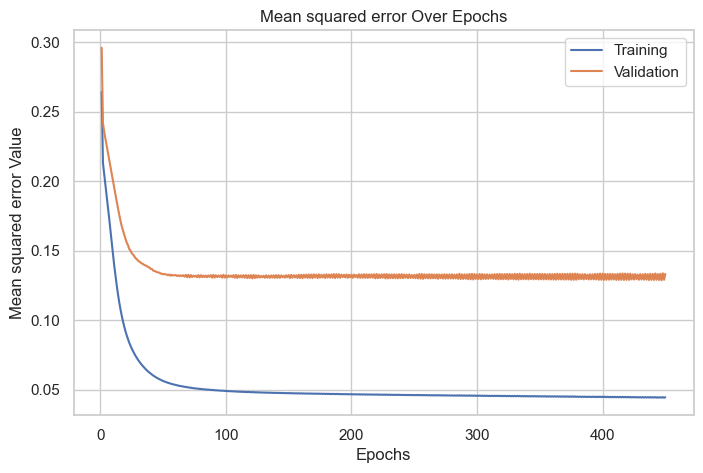

In [2]:
from src.main.utilities.utils import load_hparams, log_experiment, setup_experiment
from src.main.utilities.dataset_handler import get_monk
from src.main.evaluation.grid_search import RandomGridSearch
from src.main.evaluation.holdout_CV import holdout_CV

def print_score(mean, std):
    for key in mean.keys():
        print(key, "\t", mean[key], "+\-", std[key])



x_train, y_train, x_test, y_test = get_monk(3)

hyperparameters = load_hparams("monk1")

grid_search = RandomGridSearch(hyperparameters)

train_mean, train_std, val_mean, val_std, test_mean, test_std, model, params, histories = (
    holdout_CV(x_train, y_train, grid_search, verbose=True)
)
log_experiment(setup_experiment("monk3"), model, train_mean, train_std, val_mean, val_std, test_mean, test_std, histories)

model.summary()

print("epochs:", params[0])
print("batch_size:", params[1])

print("------ Train scores: ------ ")
print_score(train_mean, train_std)
print("------ Validation scores: ------ ")
print_score(val_mean, val_std)
print("------ Test scores: ------ ")
print_score(test_mean, test_std)


-------- Model Summary --------
Model Summary:
Optimizer: Stochastic Gradient Descent
Learning rate: 0.5
Momentum: 0.1
Loss: Mean Squared Error
Metrics: ['Binary Accuracy']
Callback: None
Regularizer: L2
 
-------- Dense Layer --------
Input size:  17
Output size:  12
Weights initializer:  Range
Bias initializer:  Range
Activation:  ReLu
Parameters:  216
-------- Dense Layer --------
Input size:  12
Output size:  1
Weights initializer:  Range
Bias initializer:  Range
Activation:  ReLu
Parameters:  13
 
epochs: 450
batch_size: 64

------ Train scores: ------ 
{'Binary Accuracy': 0.944954128440367, 'Mean Squared Error': 0.05527960358085263}
------ Validation scores: ------ 
{'Binary Accuracy': 1.0, 'Mean Squared Error': 0.026524774471183937}
------ Test scores: ------ 
{'Binary Accuracy': 0.9537037037037037, 'Mean Squared Error': 0.022225406004393707}


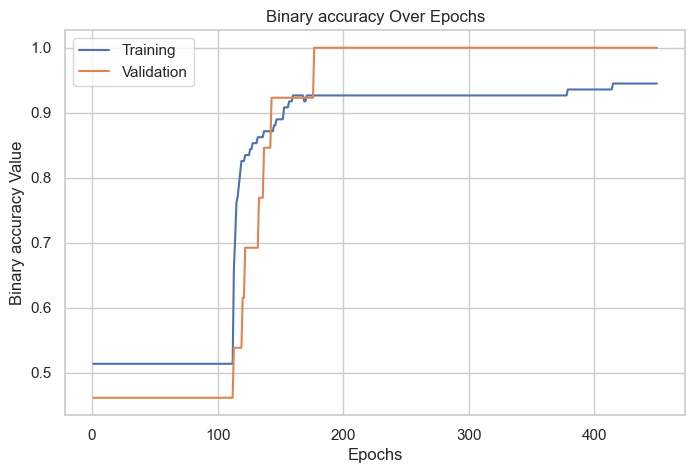

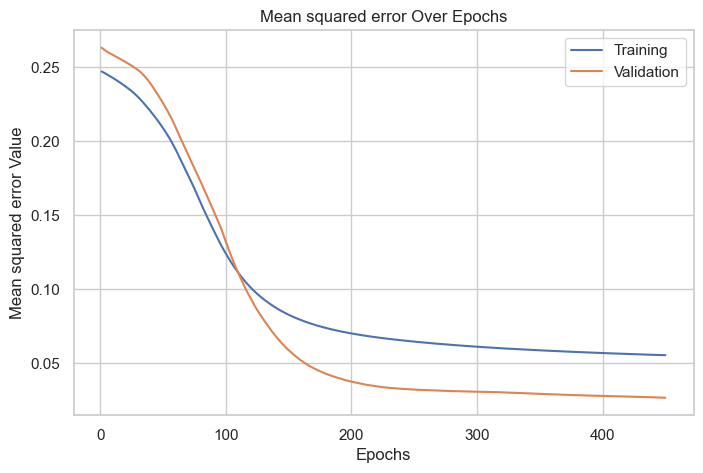

In [17]:
from sklearn.model_selection import train_test_split
from src.main.utilities.dataset_handler import get_monk
from src.main.models.layers.dense import Dense
from src.main.models.model import Model
from src.main.optimizer import SGD
from src.main.regularizer import L2, L1
from src.main.utilities.utils import log_experiment, setup_experiment, shuffle_data

x_train, y_train, x_test, y_test = get_monk(3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

model = Model()
model.add(Dense(17, 4, activation="relu", weight_initializer="glorot_uniform", bias_initializer="zeros"))
model.add(Dense(4, 1, activation="sigmoid", weight_initializer="glorot_uniform", bias_initializer="zeros"))

optimizer = SGD(learning_rate=0.3, momentum=0.6)
l1 = L1(0.005)

model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["binary_accuracy"])

_, history = model.fit(x_train, y_train, x_val, y_val, epochs=450, batch_size=x_train.shape[0], verbose=False)

train_score = model.evaluate(x_train, y_train)
val_score = model.evaluate(x_val, y_val)
test_score = model.evaluate(x_test, y_test)
train_std = {}
val_std = {}
test_std = {}

for key in test_score.keys():
    train_std[key] = 0.0
    val_std[key] = 0.0
    test_std[key] = 0.0

log_experiment(setup_experiment("monk3.1"),model, train_score, train_std, val_score, val_std, test_score, test_std, [history])


print("------ Train scores: ------ ")
print(train_score)
print("------ Validation scores: ------ ")
print(val_score)
print("------ Test scores: ------ ")
print(test_score)
